# HR - Attrition Analytics: Predict Attrition 

Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources. So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the impact to the orgranization.

This dataset is taken from kaggle https://www.kaggle.com/ludobenistant/hr-analytics

Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

In [1]:
import pandas as pd
import numpy as np

# Loadin the dataset

In [2]:
hr_df = pd.read_csv( 'https://drive.google.com/uc?export=download&id=1GdHuCLYHGEQeD_p5C9XrilPE2je1LSaO' )

In [3]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [4]:
hr_df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
10082,0.73,1.00,2,229,3,0,0,0,marketing,medium
10437,0.89,0.56,4,225,4,0,0,0,technical,medium
5588,0.49,0.89,2,233,4,1,0,0,sales,medium
657,0.43,0.55,2,130,3,0,1,0,support,high
5953,0.83,0.54,4,189,4,0,0,0,RandD,low
12159,0.45,0.45,2,132,3,0,1,0,marketing,low
7245,0.75,0.96,4,150,2,0,0,0,product_mng,low
12390,0.78,1.00,4,253,5,0,1,0,marketing,low
3283,0.54,0.61,3,182,2,0,0,0,sales,low
9242,0.80,0.62,4,216,2,0,0,0,marketing,medium


In [5]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [6]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Encoding Categorical Features

In [7]:
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']

In [8]:
categorical_features = ['Work_accident','promotion_last_5years', 'sales', 'salary']

In [9]:
hr_df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

### An utility function to create dummy variable

In [10]:
hr_df = pd.get_dummies( hr_df, columns = categorical_features, drop_first = True )

In [11]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'left', 'Work_accident_1',
       'promotion_last_5years_1', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_low',
       'salary_medium'],
      dtype='object')

In [12]:
hr_df[['salary_low', 'salary_medium']][0:5]

,salary_low,salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


# Splitting the dataset

In [13]:
feature_columns = hr_df.columns.difference( ['left'] )

In [14]:
feature_columns

Index(['Work_accident_1', 'average_montly_hours', 'last_evaluation',
       'number_project', 'promotion_last_5years_1', 'salary_low',
       'salary_medium', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'satisfaction_level',
       'time_spend_company'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( hr_df[feature_columns],
                                                    hr_df['left'],
                                                    test_size = 0.2,
                                                    random_state = 42 )

# Building Models

## Building Decision Tree 

In [16]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [17]:
clf_tree = DecisionTreeClassifier( max_depth = 4, criterion = 'gini' )
clf_tree.fit( train_X, train_y, )

DecisionTreeClassifier(max_depth=4)

### Predicting on Test Set

- p(y) >= 0.5,  y = 1 (L)
- p(y) < 0.5, y = 0 (NL)

In [18]:
tree_test_pred = pd.DataFrame( {'actual':  test_y,
                              'predicted': clf_tree.predict( test_X ) } )

### Comparing the predictions with actual test data

In [19]:
tree_test_pred.sample( n = 10 )

,actual,predicted
10668,0,0
12054,1,1
4787,0,0
7799,0,0
5339,0,0
9530,0,0
14354,1,1
9514,0,0
12411,1,1
1107,1,1


In [20]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Creating a confusion matrix

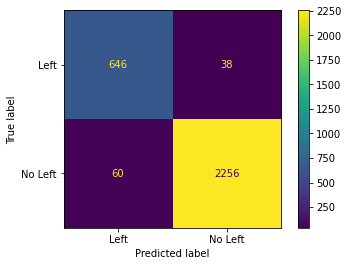

In [21]:
tree_cm = confusion_matrix( tree_test_pred.predicted, 
                                   tree_test_pred.actual, 
                                   labels = [1,0] )
disp = ConfusionMatrixDisplay(confusion_matrix = tree_cm, 
                              display_labels = ["Left", "No Left"])
disp.plot();

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(tree_test_pred.actual, tree_test_pred.predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2294
           1       0.94      0.92      0.93       706

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.95      3000
weighted avg       0.97      0.97      0.97      3000



## Visualizing Decision Tree

In [24]:
from sklearn.tree import plot_tree

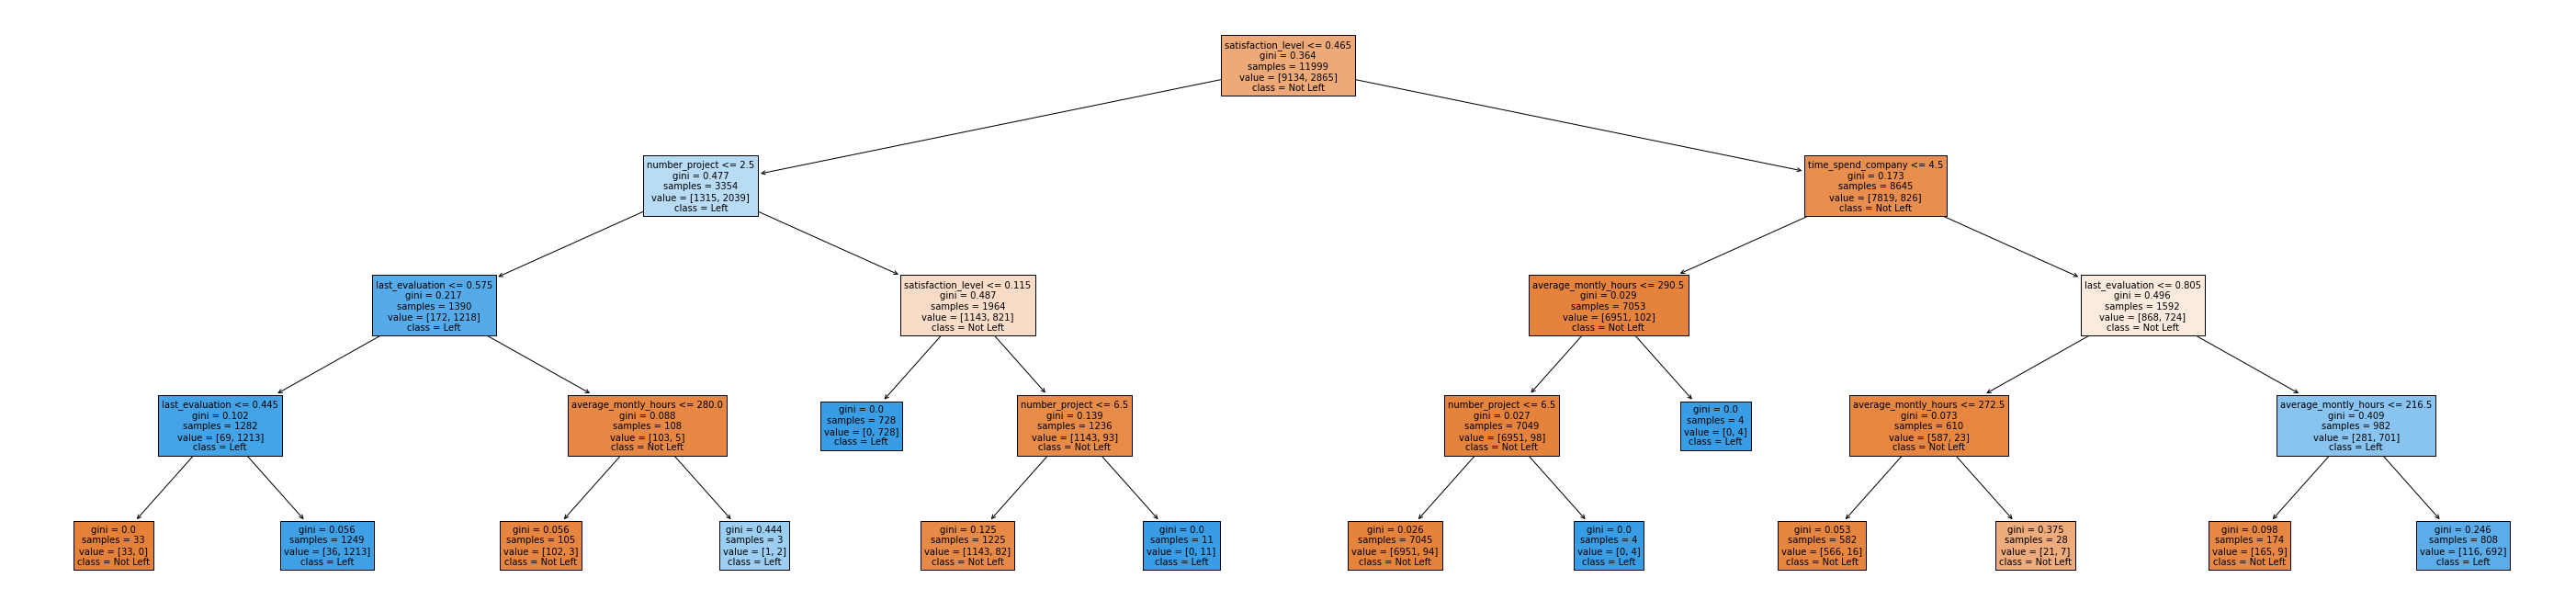

In [25]:
plt.figure(figsize = (50, 12))
plot_tree(clf_tree,
          feature_names = feature_columns,
          class_names = ['Not Left', 'Left'],
          filled = True,
          fontsize = 10);
plt.savefig('tree.png')

## Predit Probability

In [26]:
test_X[:1]

,Work_accident_1,average_montly_hours,last_evaluation,number_project,promotion_last_5years_1,salary_low,salary_medium,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,satisfaction_level,time_spend_company
6723,1,226,0.96,5,0,0,1,0,0,0,0,1,0,0,0,0,0.65,2


In [27]:
clf_tree.predict_proba( test_X[:1] )

array([[0.9866572, 0.0133428]])

### How good the model is?

In [28]:
predict_proba_df = clf_tree.predict_proba( test_X )

In [29]:
predict_proba_df

array([[0.9866572, 0.0133428],
       [0.9866572, 0.0133428],
       [0.9866572, 0.0133428],
       ...,
       [0.9866572, 0.0133428],
       [0.9866572, 0.0133428],
       [0.       , 1.       ]])

In [30]:
tree_test_pred['Left_1'] = predict_proba_df[:, 1]

In [31]:
tree_test_pred

,actual,predicted,Left_1
6723,0,0,0.013343
6473,0,0,0.013343
4679,0,0,0.013343
862,1,1,0.971177
7286,0,0,0.013343
...,...,...,...
3297,0,0,0.027491
14113,0,1,0.856436
5514,0,0,0.013343
9939,0,0,0.013343


In [32]:
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


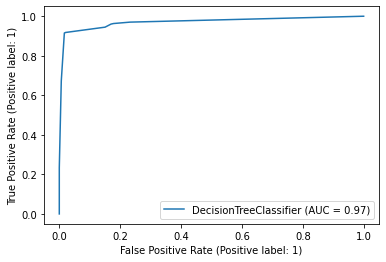

In [33]:
plot_roc_curve(clf_tree, test_X, test_y);

In [34]:
auc_score = metrics.roc_auc_score( tree_test_pred.actual, tree_test_pred.Left_1  )
round( float( auc_score ), 2 );

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


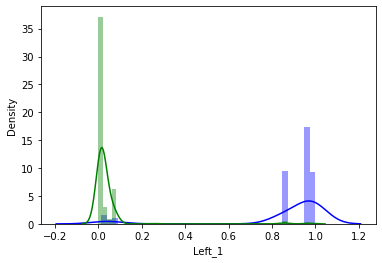

In [35]:
sn.distplot( tree_test_pred[tree_test_pred.actual == 1]["Left_1"], color = 'b' )
sn.distplot( tree_test_pred[tree_test_pred.actual == 0]["Left_1"], color = 'g' );

### Finding Optimal Depth for Decision Tree

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
tuned_parameters = [{'max_depth': range(4,10),
                   'criterion': ['gini', 'entropy']}]

In [38]:
clf_tree = DecisionTreeClassifier()

clf = GridSearchCV(clf_tree,
                 tuned_parameters,
                 cv=5,
                 return_train_score = True,  
                 scoring='roc_auc')

clf.fit(train_X, train_y )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(4, 10)}],
             return_train_score=True, scoring='roc_auc')

In [39]:
clf.cv_results_

{'mean_fit_time': array([0.03132844, 0.03529   , 0.03634377, 0.03829527, 0.03841457,
        0.0426506 , 0.02554874, 0.03104825, 0.03694353, 0.04443598,
        0.05522661, 0.04844933]),
 'mean_score_time': array([0.01494117, 0.00604277, 0.00900855, 0.01289802, 0.00719814,
        0.00737333, 0.00714669, 0.0071672 , 0.00761032, 0.00843086,
        0.00713987, 0.00592012]),
 'mean_test_score': array([0.9717427 , 0.97596757, 0.9773934 , 0.97810942, 0.97825654,
        0.97739243, 0.97380157, 0.97994453, 0.98226834, 0.98317102,
        0.98265   , 0.98232846]),
 'mean_train_score': array([0.97234264, 0.9787604 , 0.98287552, 0.9873898 , 0.99007423,
        0.99273049, 0.97561786, 0.98249722, 0.98670853, 0.9901391 ,
        0.9931548 , 0.9951379 ]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, False, Fal

In [40]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [41]:
clf.best_score_

0.9831710153797564

In [42]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7)

## Feature Importance

In [43]:
clf.best_estimator_.feature_importances_

array([0.        , 0.06813976, 0.13675019, 0.19228684, 0.        ,
       0.        , 0.00039052, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00123875, 0.00088795,
       0.00184938, 0.37848973, 0.21996689])

In [44]:
feature_rank = pd.DataFrame( {"feature": train_X.columns, 
                              "importance": clf.best_estimator_.feature_importances_} )


In [45]:
feature_rank = feature_rank.sort_values("importance", ascending=False)
feature_rank

,feature,importance
16,satisfaction_level,0.378490
17,time_spend_company,0.219967
3,number_project,0.192287
2,last_evaluation,0.136750
1,average_montly_hours,0.068140
15,sales_technical,0.001849
13,sales_sales,0.001239
14,sales_support,0.000888
6,salary_medium,0.000391
11,sales_marketing,0.000000


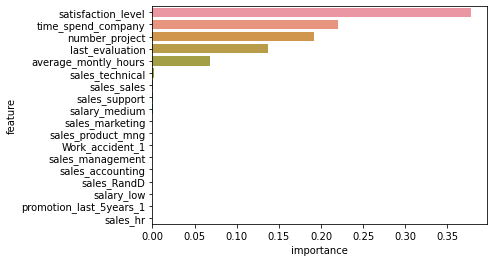

In [46]:
sn.barplot( y = 'feature', x = 'importance', data = feature_rank );

In [47]:
selected_features = ['satisfaction_level',
                     'number_project',
                     'time_spend_company',
                     'last_evaluation',
                     'average_montly_hours']

### Building a Decision Tree with important features

In [48]:
clf_tree = DecisionTreeClassifier( max_depth = 4 )
clf_tree.fit( train_X[selected_features], train_y, )

DecisionTreeClassifier(max_depth=4)

In [49]:
dtree_test_pred = pd.DataFrame( { 'actual':  test_y,
                              'predicted': clf_tree.predict( test_X[selected_features] ) } )

In [50]:
metrics.accuracy_score( dtree_test_pred.actual, 
                        dtree_test_pred.predicted )

0.9673333333333334